## **Unsupervise Learning Project**

## Project Overview

1. Load data
2. Preprocess it
3. Perform clustering
4. Visualize the results
5. Interpret clusters

## Problem Statement
### Market Segmentation of Customers Using Unsupervised Learning

Businesses often want to understand their customers better to tailor marketing strategies, improve customer service, and increase sales. However, customer data usually consists of many individuals with diverse behaviors, preferences, and spending habits. Manually grouping customers is not feasible, especially when the data is large and complex.

### The problem addressed in this project is:

How can we automatically identify distinct groups or segments of customers based on their income and spending behavior, without prior knowledge of how many groups exist or what defines them?

### By clustering customers into meaningful segments, the business can:

- Target marketing campaigns more effectively

- Develop customized offers for different groups

- Improve resource allocation and customer retention strategies

### Importing Parckages

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [10]:
url = "https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?resource=download"

In [11]:
df = pd.read_csv(r"C:\Users\F8874363\OneDrive - FRG\Pictures\Camera Roll\Mall_Customers.csv")
print("Sample data:")
print(df.head())

Sample data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [12]:
print(df.tail())

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83


## Select features for clustering

In [16]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [17]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# K-means clustering with 5 clusters
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

C:\Users\F8874363\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
# Assign cluster labels
df['Cluster'] = clusters

### PCA for 2D visualization

In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

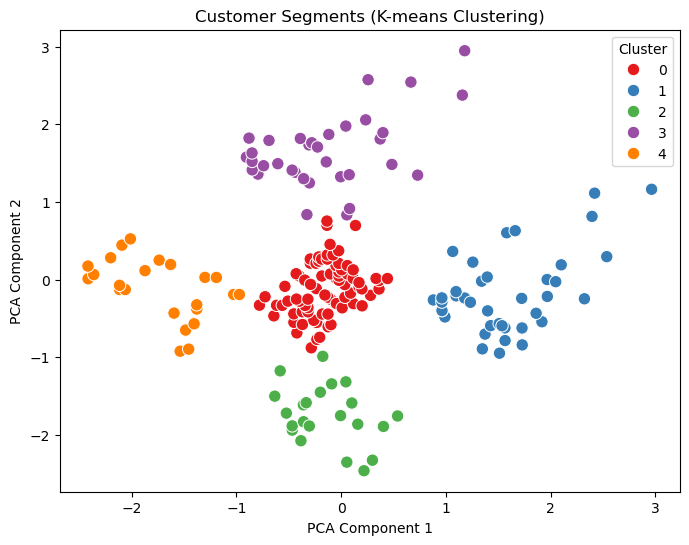

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='Set1', s=80)
plt.title('Customer Segments (K-means Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

### Cluster centers in scaled and original space

In [24]:
print("\nCluster centers (scaled):")
print(kmeans.cluster_centers_)

centers_orig = scaler.inverse_transform(kmeans.cluster_centers_)
print("\nCluster centers (original scale):")
for i, center in enumerate(centers_orig):
    print(f"Cluster {i}: Annual Income = {center[0]:.2f}k$, Spending Score = {center[1]:.2f}")


Cluster centers (scaled):
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]

Cluster centers (original scale):
Cluster 0: Annual Income = 55.30k$, Spending Score = 49.52
Cluster 1: Annual Income = 86.54k$, Spending Score = 82.13
Cluster 2: Annual Income = 25.73k$, Spending Score = 79.36
Cluster 3: Annual Income = 88.20k$, Spending Score = 17.11
Cluster 4: Annual Income = 26.30k$, Spending Score = 20.91


### Summary statistics per cluster

In [27]:
print("\nCluster summary statistics:")
print(df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())


Cluster summary statistics:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [28]:
### ✅ **Summary Conclusion**

We used unsupervised learning (K-Means clustering) to segment mall customers based on income and spending habits. The analysis revealed **5 distinct customer groups**, each with unique behaviors. These insights can help businesses **target marketing**, improve **customer experience**, and make **data-driven decisions** for growth.


SyntaxError: invalid syntax (1453933587.py, line 3)